In [149]:
####################
# Load Data #
####################

In [147]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from math import log, exp

In [157]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [159]:
# Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

In [160]:
test_ID

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
30      1491
31      1492
32      1493
33      1494
34      1495
35      1496
36      1497
37      1498
38      1499
39      1500
40      1501
41      1502
42      1503
43      1504
44      1505
45      1506
46      1507
47      1508
48      1509
49      1510
        ... 
1409    2870
1410    2871
1411    2872
1412    2873
1413    2874
1414    2875
1415    2876
1416    2877
1417    2878
1418    2879
1419    2880
1420    2881
1421    2882
1422    2883
1423    2884
1424    2885
1425    2886
1426    2887
1427    2888
1428    2889
1429    2890
1430    2891
1431    2892
1432    2893
1433    2894
1434    2895

In [150]:
# Now drop the 'Id' colum since we can not use it as a feature to train our model.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

In [49]:
y_train_raw = train_df['SalePrice']
x_train_raw = train_df.drop('SalePrice', axis=1)
x_test_raw = test_df.copy()

In [50]:
print(x_train_raw.shape)
print(x_test_raw.shape)

(1460, 79)
(1459, 79)


In [6]:
########################
# Multi Linear Model_1 #
########################

In [51]:
x_train = x_train_raw.copy()
y_train = y_train_raw.copy()
x_test = x_test_raw.copy()

In [52]:
all_data = pd.concat([x_train, x_test])
all_data.shape

(2919, 79)

In [53]:
#call the impute function in process module
from preprocess import impute_multi_1
df_train = impute_multi_1(all_data)

In [54]:
#use one_hot encoding to dummify all the category data
one_hot_df = pd.get_dummies(df_train, drop_first=True, dummy_na=True)

In [55]:
#choose the first 1460 as train sample
x_train = one_hot_df.iloc[list(range(1460)),:]

In [56]:
#choose the first 1460 as train sample
x_test = one_hot_df.iloc[list(range(1460,2919)),:]

In [57]:
y_train = [log(x) for x in y_train]

In [58]:
#LotArea Log; LotFrontage, MasVnrArea, BsmtFinSF1 do x**0.5
x_train['LotArea'] =[x**0.5 for x in x_train.LotArea]
x_train['LotFrontage']=[x**0.5 for x in x_train.LotFrontage]
x_train['MasVnrArea']=[x**0.5 for x in x_train['MasVnrArea']]
x_train['BsmtFinSF1']=[x**0.5 for x in x_train.BsmtFinSF1]
x_train['BsmtUnfSF']=[x**0.5 for x in x_train.BsmtUnfSF]
x_train['TotalBsmtSF']=[x**0.5 for x in x_train.TotalBsmtSF]
x_train['1stFlrSF']=[x**0.5 for x in x_train['1stFlrSF']]

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [59]:
#transform x**0.5
x_train['2ndFlrSF']=[x**0.5 for x in x_train['2ndFlrSF']]
x_train['GrLivArea']=[x**0.5 for x in x_train['GrLivArea']]
x_train['GarageArea']=[x**0.5 for x in x_train['GarageArea']]
x_train['TotalSF']=[x**0.5 for x in x_train['TotalSF']]
x_train['OpenPorchSF']=[x**0.5 if x>0 else x for x in x_train['OpenPorchSF']]
x_train['WoodDeckSF']=[x**0.5 if x>0 else x for x in x_train['WoodDeckSF']]

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [60]:
#test set transformation
x_test['LotArea'] =[x**0.5 for x in x_test.LotArea]
x_test['LotFrontage']=[x**0.5 for x in x_test.LotFrontage]
x_test['MasVnrArea']=[x**0.5 for x in x_test['MasVnrArea']]
x_test['BsmtFinSF1']=[x**0.5 for x in x_test.BsmtFinSF1]
x_test['BsmtUnfSF']=[x**0.5 for x in x_test.BsmtUnfSF]
x_test['TotalBsmtSF']=[x**0.5 for x in x_test.TotalBsmtSF]
x_test['1stFlrSF']=[x**0.5 for x in x_test['1stFlrSF']]

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [62]:
#test set transformation
x_test['2ndFlrSF']=[x**0.5 for x in x_test['2ndFlrSF']]
x_test['GrLivArea']=[x**0.5 for x in x_test['GrLivArea']]
x_test['GarageArea']=[x**0.5 for x in x_test['GarageArea']]
x_test['TotalSF']=[x**0.5 for x in x_test['TotalSF']]
x_test['OpenPorchSF']=[x**0.5 if x>0 else x for x in x_test['OpenPorchSF']]
x_test['WoodDeckSF']=[x**0.5 if x>0 else x for x in x_test['WoodDeckSF']]

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [63]:
#all the types of x_train features
#[type(x_train[x][0]) for x in x_train.columns]

In [64]:
alphas = np.logspace(-1, 0.1, 30)

/Users/Strider/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


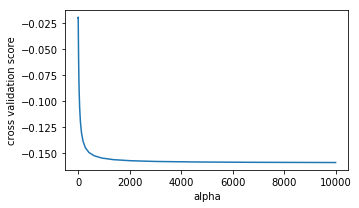

In [65]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
alphas = np.logspace(-1, 4, 30)

plt.figure(figsize=(5, 3))

scores = [cross_val_score(linear_model.Ridge(alpha, normalize=True), x_train, y_train, cv=5, scoring='neg_mean_squared_error').mean() for alpha in alphas]
plt.plot(alphas, scores)

plt.legend(loc='lower left')
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()

In [66]:
np.argmax(scores)

3

In [67]:
alphas[3]

0.32903445623126687

In [68]:
ridge_1st = linear_model.Ridge(0.329, normalize=True)

In [69]:
ridge_1st.fit(x_train, y_train)

Ridge(alpha=0.329, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [70]:
ridge_1st.score(x_train, y_train)

0.92369940771995274

In [172]:
ridge_1st_test = ridge_1st.predict(x_test)

In [177]:
ridge_1st_test.head()

0    119347
1    162394
2    184412
3    201511
4    196479
Name: SalePrice, dtype: int64

In [175]:
ridge_1st_test = pd.Series([round(exp(x)) for x in ridge_1st_test],name='SalePrice')

In [179]:
ridge_1st_out = pd.concat([test_ID, ridge_1st_test], axis=1) 

In [180]:
ridge_1st_out.to_csv('ridge_1st.csv')

In [181]:
ridge_1st_out.head()

,Id,SalePrice
0,1461,119347
1,1462,162394
2,1463,184412
3,1464,201511
4,1465,196479


In [ ]:
##########################
## Multi Linear Model_2 ##
##########################